In [1]:
import qiskit

In [19]:
from matplotlib import pyplot as plt 
import numpy as np
from qiskit_machine_learning.datasets import ad_hoc_data,sample_ad_hoc_data
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

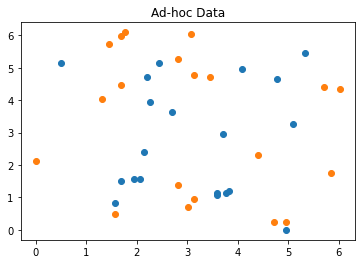

IndexError: index 84 is out of bounds for axis 0 with size 40

In [20]:
feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [ ]:
backend = BasicAer.get_backend('qssm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = 10598
